In [349]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [350]:
import numpy as np

In [351]:
from lint_analysis.bin_counts import cache

In [352]:
tokens = cache.token_counts(10000)

In [353]:
import re

from collections import OrderedDict

tokens = OrderedDict([
    (t, c) for t, c in tokens.items()
    if not re.match('^[0-9ivx.]+$', t)
])

In [354]:
data = []

for i, (token, count) in enumerate(tokens.items()):
    
    series = cache.token_series(token)
    exp_var = series.sum() * (1/100) * (1 - 1/100)
    
    data.append((count, series.var(), exp_var))
    
    if i % 1000 == 0: print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [355]:
import pandas as pd

df = pd.DataFrame(
    data,
    columns=('count', 'var', 'exp'),
    index=tokens.keys(),
)

In [356]:
import math

df['score'] = df.index.map(
    lambda t: df.loc[t]['var'] / df.loc[t]['exp']
)

In [357]:
top = df.sort_values('score', ascending=False).head(500)

In [358]:
import random

shuffled = list(top.index)
random.shuffle(shuffled)

In [359]:
series = {
    token: cache.token_series(token)
    for token in top.index
}

In [360]:
from itertools import combinations
from scipy.spatial import distance

In [361]:
d = []
for i, (t1, t2) in enumerate(combinations(shuffled, 2)):
    
    s1 = series[t1]
    s2 = series[t2]
    
    d.append(distance.euclidean(s1/s1.sum(), s2/s2.sum()))

In [362]:
from scipy.cluster.hierarchy import linkage, dendrogram

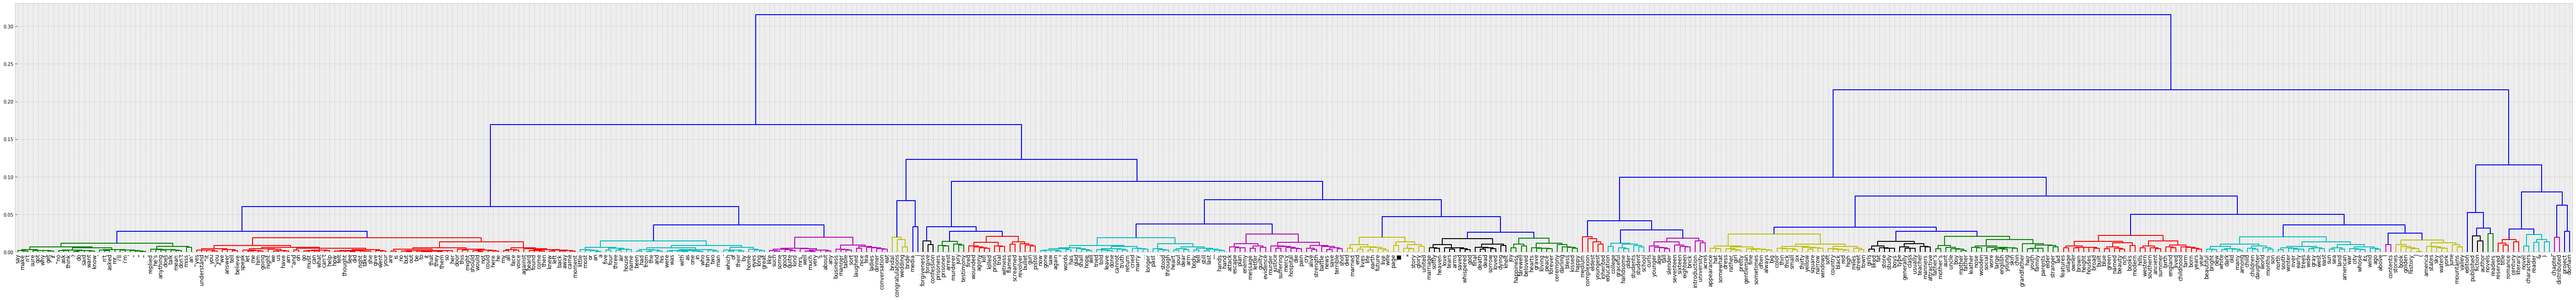

In [365]:
link = linkage(d, method='ward')

plt.figure(figsize=(100, 10))
dendrogram(link, labels=shuffled, orientation='top', leaf_font_size=12, color_threshold=0.025)
plt.show()

In [507]:
import math

from scipy.ndimage.measurements import center_of_mass

class Cohorts(dict):
        
    def add(self, key, label, token_str):
        tokens = map(str.strip, token_str.strip().splitlines())
        self[key] = (label, list(tokens))
        
    def density(self, key):

        _, tokens = self[key]
        
        series = np.array([
            cache.token_series(token)
            for token in tokens
        ])
        
        return series / series.sum(1)[:,None]
        
    def center_of_mass(self, key):
        density = self.density(key)
        return center_of_mass(np.array(density).sum(0))[0]
    
    def plot_multiples(self, cols=5):

        # Get row count and figure size.
        rows = math.ceil(len(self) / cols)
        figsize = (cols*2, rows*2)

        # Make the figure + axes.
        fig, axarr = plt.subplots(rows, cols, figsize=(cols*2, rows*1.5))
        fig.tight_layout(pad=2)

        for i, (label, tokens) in enumerate(cohorts.values()):

            for token in tokens:

                # Select the axis for the next plot.
                ax = axarr[math.floor(i/cols)][i%cols]

                # Configure axes.
                ax.set_title(label, fontsize=10)
                ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
                ax.tick_params(labelsize=8)

                # Plot the series.
                series = cache.token_series(token.strip())
                ax.plot(series/series.sum(), c='b', lw=0.5)

        plt.show()

In [508]:
cohorts = Cohorts()

In [509]:
cohorts.add('paratext', 'Paratext', '''
project
domain
chapter
distributed
_
j.
reader
&
characters
novel
literary
century
romance
title
reserved
readers
novels
author
fiction
published
edition
''')

In [510]:
cohorts.add('outdoors', 'Location, geography', '''
valley
mountains
june
waters
york
sky
states
america
history
golden
book
stories
contents
ago
above
wind
its
whose
city
war
land
american
sea
sun
east
west
gray
wide
trees
early
river
winter
south
north
months
son
world
children
daughter
child
many
among
old
dark
white
bright
new
beautiful
''')

In [511]:
cohorts.add('birth_time_color', 'Birth, time, color', '''
year
years
born
farm
childhood
england
lived
birth
summer
ancient
southern
western
hills
modern
books
beauty
rich
named
green
blue
built
broad
houses
height
brown
owned
features
village
''')

In [512]:
cohorts.add('youth_family_body', 'Youth, family, body', '''
lad
stranger
elder
family
parents
hair
youth
grandfather
chin
skin
english
young
large
wore
social
wooden
nose
leather
mother
father
boy
uncle
aunt
''')

In [513]:
cohorts.add('elementary_school', 'Elementary school', '''
manners
attractive
teacher
class
usually
generally
type
study
boys
store
fat
liked
girls
''')

In [514]:
cohorts.add('size_color', 'Size and color', '''
street
town
miles
red
high
black
country
soft
narrow
windows
yellow
square
thirty
six
small
thick
thin
color
''')

In [515]:
cohorts.add('how_often', 'How often? To what extent?', '''
always
big
often
sometimes
fine
gentleman
pretty
girl
rather
dress
somewhat
hat
appearance
''')

In [516]:
cohorts.add('youth_education', 'Youth, education', '''
acres
university
introduction
brick
eighteen
sixteen
seventeen
tall
slender
age
younger
curls
school
student
students
older
handsome
graceful
college
education
youngest
inherited
eldest
complexion
''')

In [517]:
cohorts.add('joy_eternity', 'Joy, eternity', '''
happy
kissed
bless
darling
ceremony
forever
peace
loving
grave
hearts
beloved
farewell
joy
happiness
''')

In [518]:
cohorts.add('death_god', 'Death, god, heaven', '''
dying
knelt
sorrow
loved
death
dead
final
whispered
god
saved
tears
arms
love
softly
heaven
marriage
''')

In [519]:
cohorts.add('life_future', 'Life, future, marriage', '''
live
wife
future
life
earth
lives
end
died
married
''')

In [520]:
cohorts.add('murder_death_guns', 'Murder, death, guns', '''
terrible
shot
save
news
battle
alive
strength
cry
pain
die
hospital
mercy
suffering
justice
murder
''')

In [521]:
cohorts.add('war', 'War (?)', '''
evidence
guilty
message
letter
enemy
plan
escape
attack
''')

In [522]:
cohorts.add('body_parts_emotion', 'Body parts (related to emotion)', '''
hand
hands
last
still
fell
body
dear
arm
heart
soul
''')

In [523]:
cohorts.add('exclamations', 'Exclamations', '''
longer
...
marry
cried
return
truth
cannot
leave
done
told
tried
will
hope
shall
glad
words
has
!
again
saw
now
gone
''')

In [524]:
cohorts.add('murder_trial', 'Murder, the trial', '''
gun
pistol
bullet
revolver
flames
screamed
witness
trial
prison
killed
kill
agony
wounded
fired
jury
testimony
murdered
arrest
prisoner
prisoners
''')

In [525]:
cohorts.add('confession_forgiveness', 'Confession, forgiveness', '''
confession
forgive
forgiveness
''')

In [526]:
cohorts.add('marriage', 'Marriage', '''
bride
wedding
congratulations
bridal
''')

In [527]:
cohorts.add('women_eating', 'Women eating', '''
conversation
eat
dinner
ladies
tea
laughed
nice
sort
table
manner
business
''')

In [528]:
cohorts.add('tell_believe', 'Telling, believing', '''
believe
tell
answer
“we
you
“you
understand
“yes
“it
''')

In [529]:
cohorts.add('talk_reply', 'Talking, replying', '''
miss
mean
talk
anything
does
he’s
replied
''')

In [530]:
cohorts.add('dialogue', 'Dialogue', '''
"
”
’
‘
“
i’m
i’ll
mr.
asked
n't
''')

In [531]:
cohorts.add('interiority', 'Pyschological interiority', '''
want
know
said
?
do
ask
think
“no
get
if
why
got
sure
make
say
n’t
''')

In [532]:
cohorts.add('could_would_should', 'Could, would, should', '''
here
he
could
would
not
should
''')

In [533]:
cohorts.center_of_mass('dialogue')

49.87570589631548

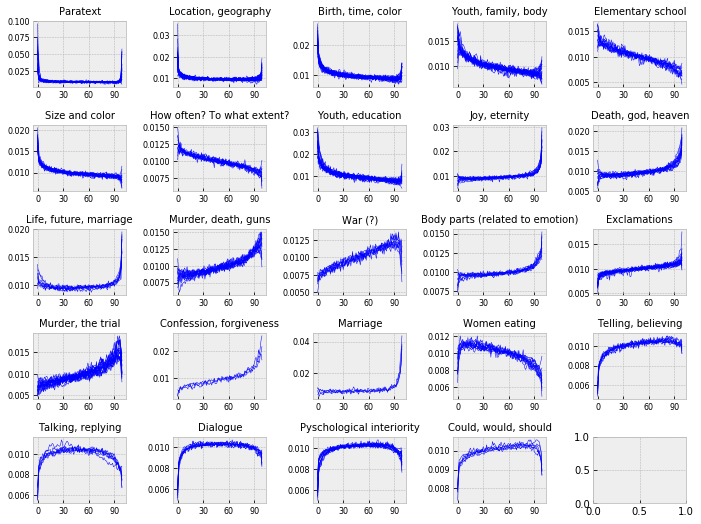

In [534]:
cohorts.plot_multiples()

In [48]:
def plot_cohort(token_string, w=8, h=8):
    
    tokens = token_string.splitlines()
    
    plt.figure(figsize=(w, h))
    
    lines = []
    for token in tokens:
        
        series = cache.token_series(token)
        line, = plt.plot(series/series.sum(), label=token)
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

## Physical environment: Geographic location, the outdoors, cardinal directions, America

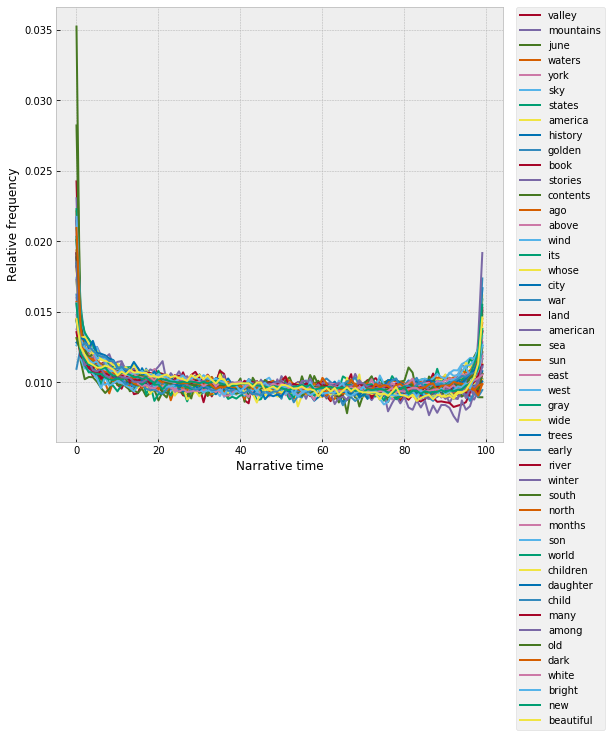

In [264]:
plot_cohort('''
valley
mountains
june
waters
york
sky
states
america
history
golden
book
stories
contents
ago
above
wind
its
whose
city
war
land
american
sea
sun
east
west
gray
wide
trees
early
river
winter
south
north
months
son
world
children
daughter
child
many
among
old
dark
white
bright
new
beautiful
''')

## Birth, time, color, dwellings

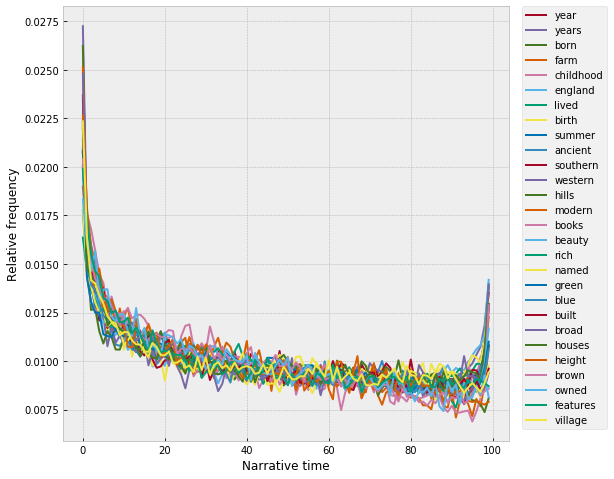

In [265]:
plot_cohort('''
year
years
born
farm
childhood
england
lived
birth
summer
ancient
southern
western
hills
modern
books
beauty
rich
named
green
blue
built
broad
houses
height
brown
owned
features
village
''')

## Youth, family, physical appearance

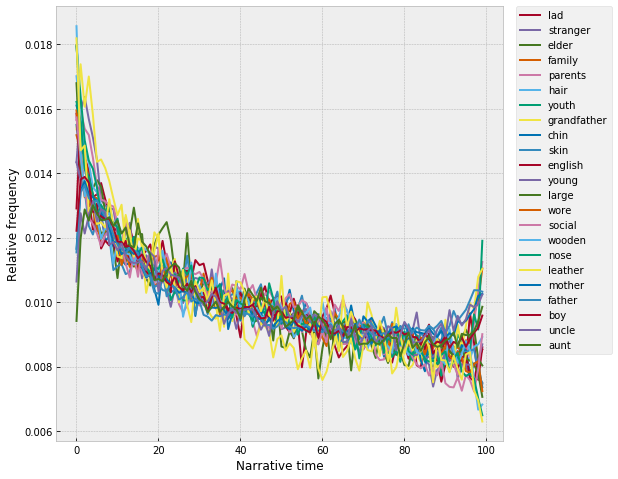

In [201]:
plot_cohort('''
lad
stranger
elder
family
parents
hair
youth
grandfather
chin
skin
english
young
large
wore
social
wooden
nose
leather
mother
father
boy
uncle
aunt
''')

## Elementary school (?)

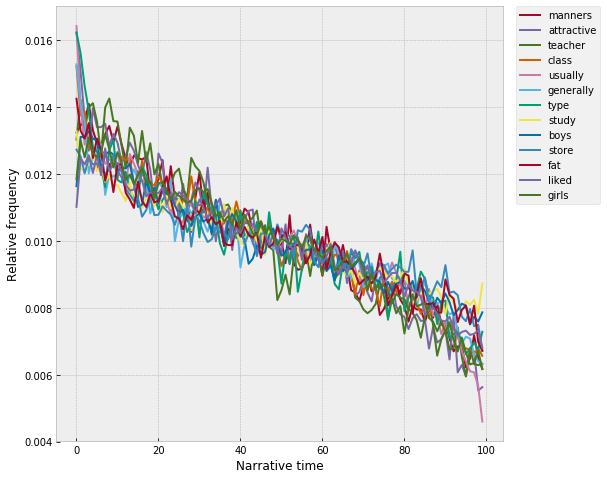

In [202]:
plot_cohort('''
manners
attractive
teacher
class
usually
generally
type
study
boys
store
fat
liked
girls
''')

## Descriptive adjectives - size and color

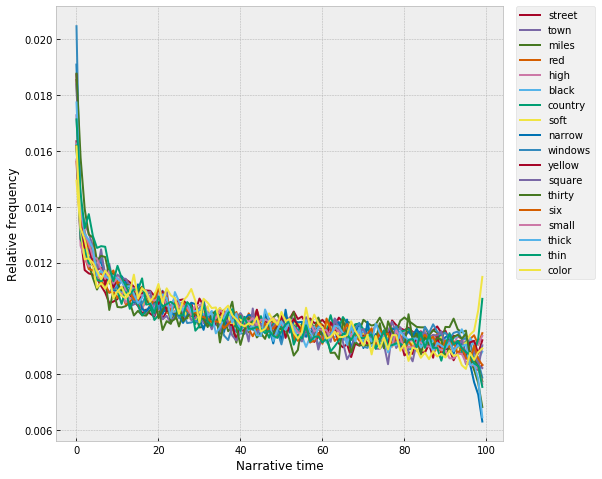

In [203]:
plot_cohort('''
street
town
miles
red
high
black
country
soft
narrow
windows
yellow
square
thirty
six
small
thick
thin
color
''')

## How often? To what extent? And, dresses and hats

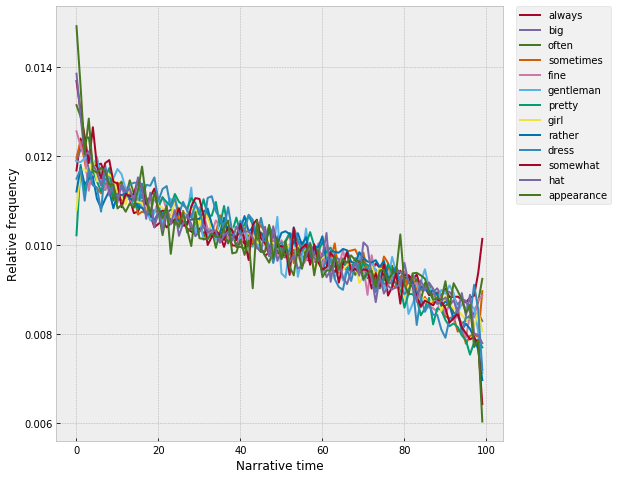

In [237]:
plot_cohort('''
always
big
often
sometimes
fine
gentleman
pretty
girl
rather
dress
somewhat
hat
appearance
''')

## Education, university, youth

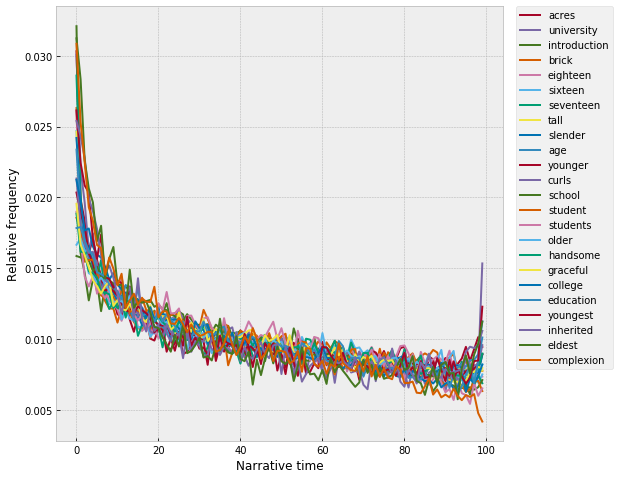

In [267]:
plot_cohort('''
acres
university
introduction
brick
eighteen
sixteen
seventeen
tall
slender
age
younger
curls
school
student
students
older
handsome
graceful
college
education
youngest
inherited
eldest
complexion
''')

## Joy, happiness, eternity

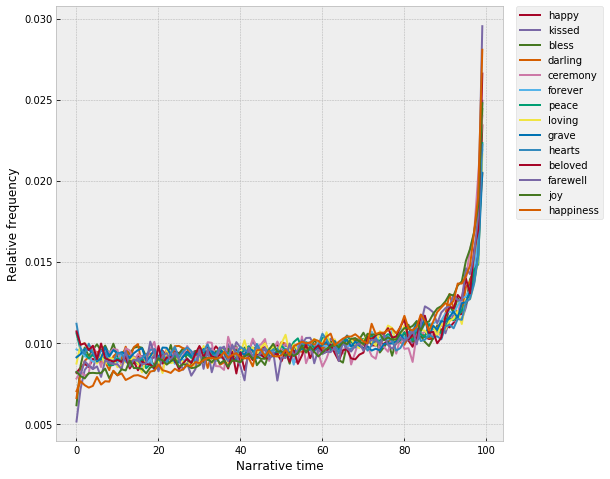

In [206]:
plot_cohort('''
happy
kissed
bless
darling
ceremony
forever
peace
loving
grave
hearts
beloved
farewell
joy
happiness
''')

## Death, sorrow, love, god

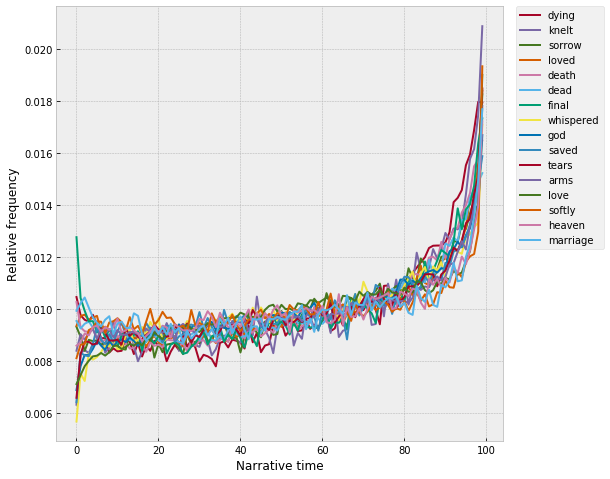

In [208]:
plot_cohort('''
dying
knelt
sorrow
loved
death
dead
final
whispered
god
saved
tears
arms
love
softly
heaven
marriage
''')

## Life, future, marriage

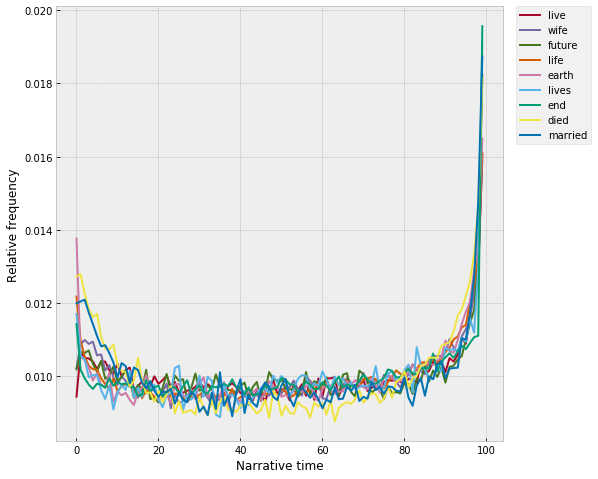

In [209]:
plot_cohort('''
live
wife
future
life
earth
lives
end
died
married
''')

## Murder, death, guns

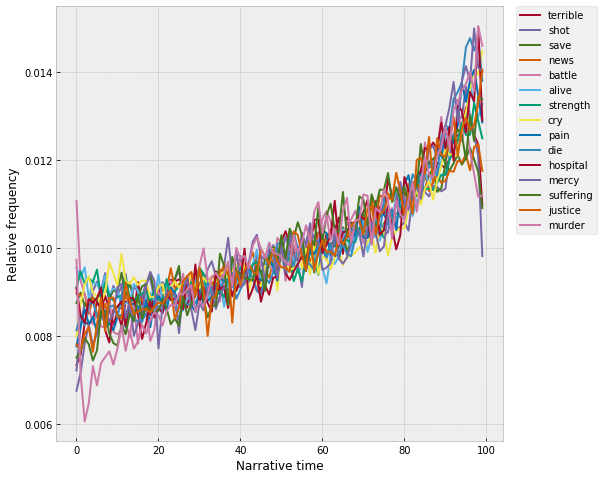

In [210]:
plot_cohort('''
terrible
shot
save
news
battle
alive
strength
cry
pain
die
hospital
mercy
suffering
justice
murder
''')

## Murder (with guns), the trial

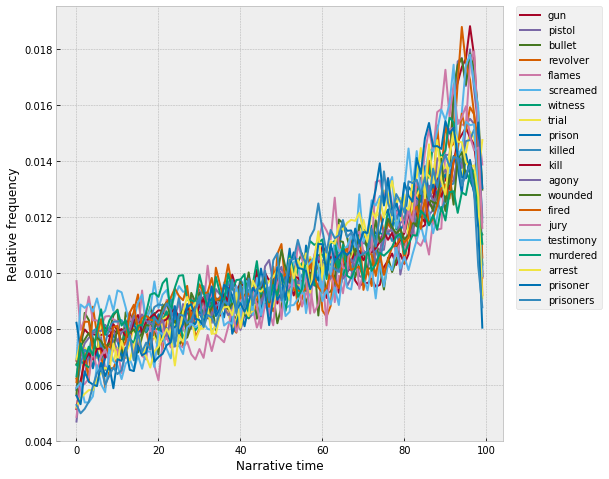

In [13]:
plot_cohort('''
gun
pistol
bullet
revolver
flames
screamed
witness
trial
prison
killed
kill
agony
wounded
fired
jury
testimony
murdered
arrest
prisoner
prisoners
''')

## War (?) - plans, messages, escapes, attacks

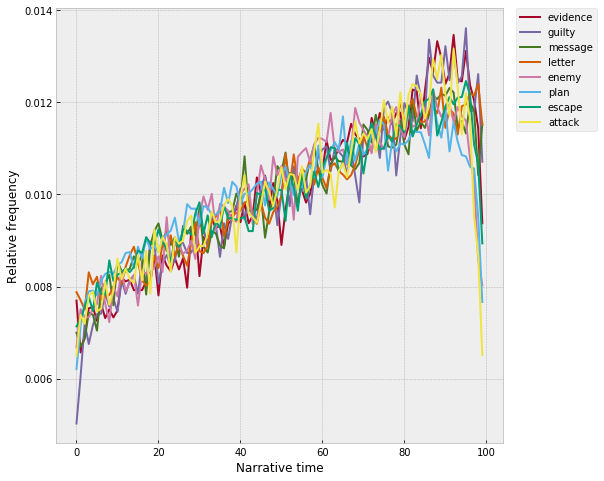

In [211]:
plot_cohort('''
evidence
guilty
message
letter
enemy
plan
escape
attack
''')

## Body parts (related to emotion)

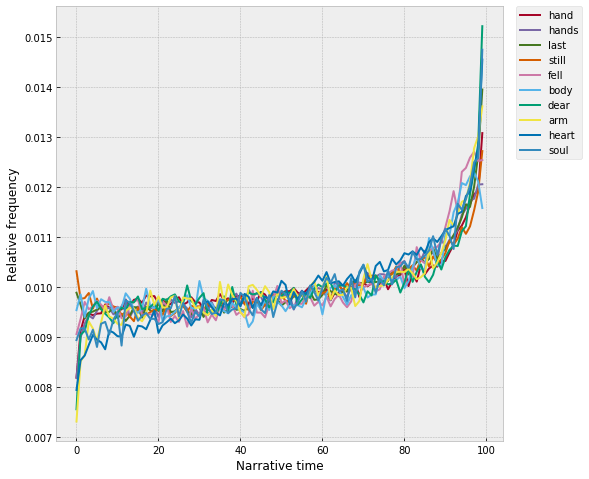

In [213]:
plot_cohort('''
hand
hands
last
still
fell
body
dear
arm
heart
soul
''')

## Exclamatory remarks (?)

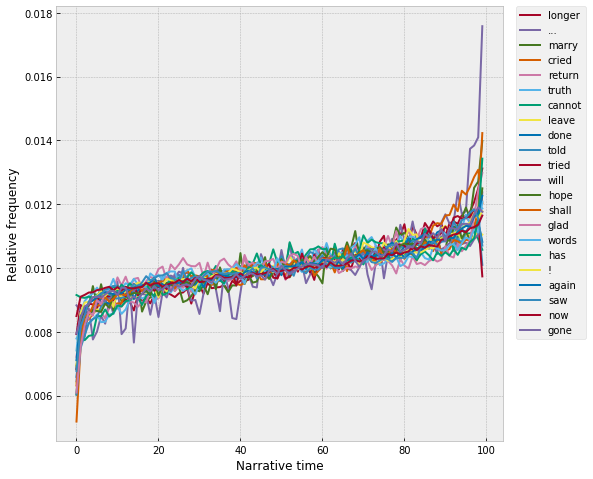

In [214]:
plot_cohort('''
longer
...
marry
cried
return
truth
cannot
leave
done
told
tried
will
hope
shall
glad
words
has
!
again
saw
now
gone
''')

## Confession, forgiveness

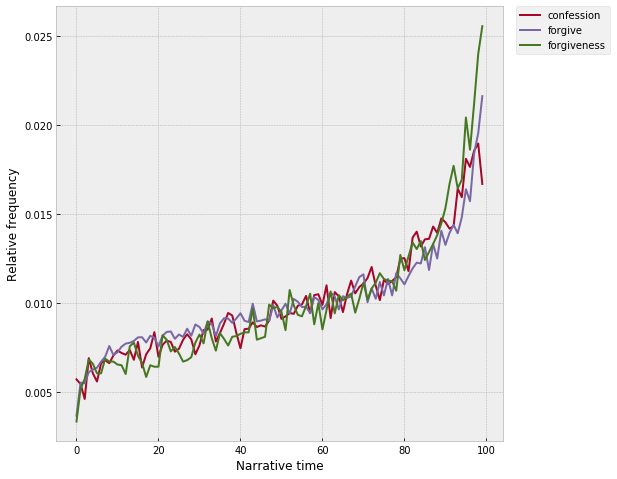

In [217]:
plot_cohort('''
confession
forgive
forgiveness
''')

## Marriage

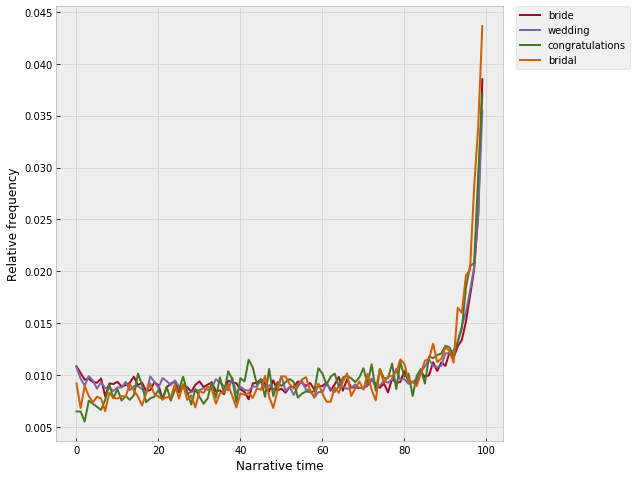

In [218]:
plot_cohort('''
bride
wedding
congratulations
bridal
''')

## Pleasant women eating food

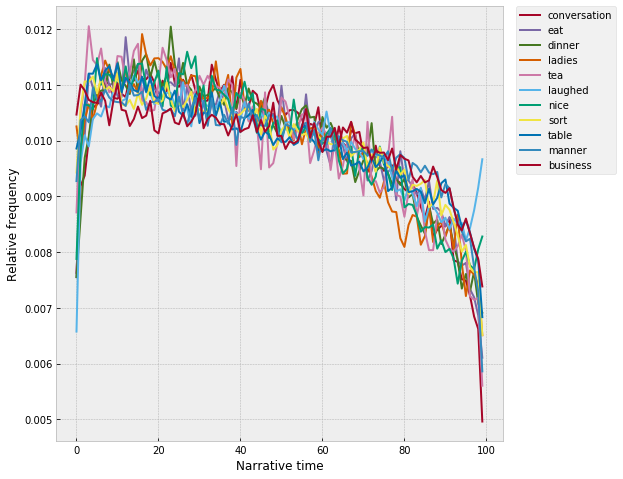

In [270]:
plot_cohort('''
conversation
eat
dinner
ladies
tea
laughed
nice
sort
table
manner
business
''')

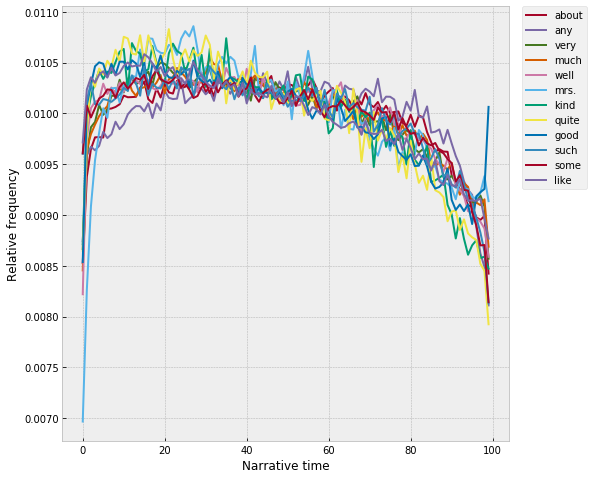

In [220]:
plot_cohort('''
about
any
very
much
well
mrs.
kind
quite
good
such
some
like
''')

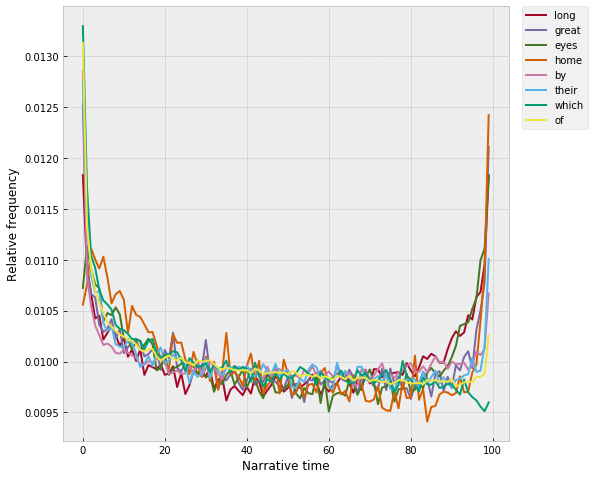

In [221]:
plot_cohort('''
long
great
eyes
home
by
their
which
of
''')

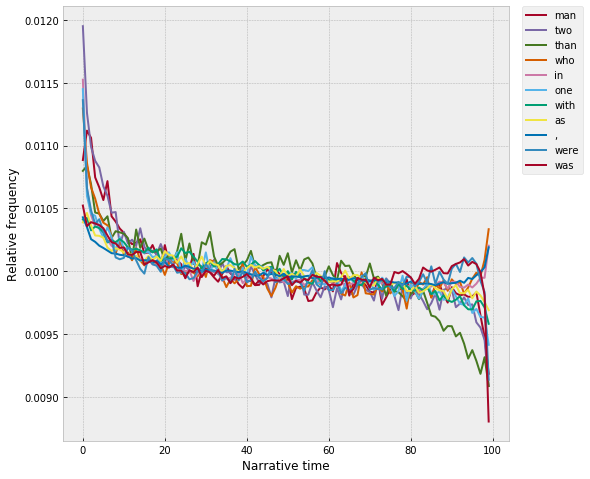

In [222]:
plot_cohort('''
man
two
than
who
in
one
with
as
,
were
was
''')

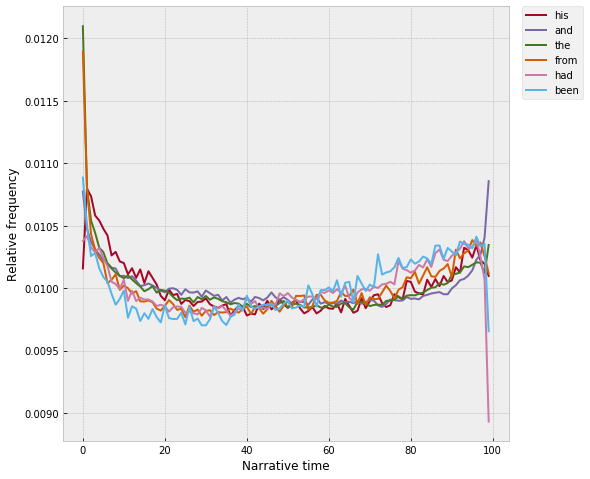

In [224]:
plot_cohort('''
his
and
the
from
had
been
''')

## 3, 4, 5 (??)

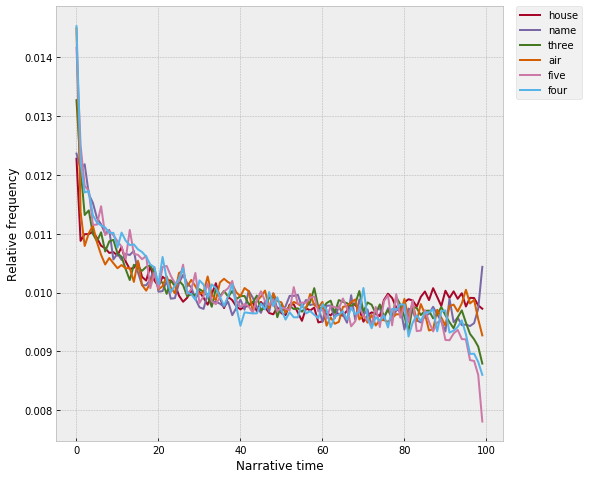

In [225]:
plot_cohort('''
house
name
three
air
five
four
''')

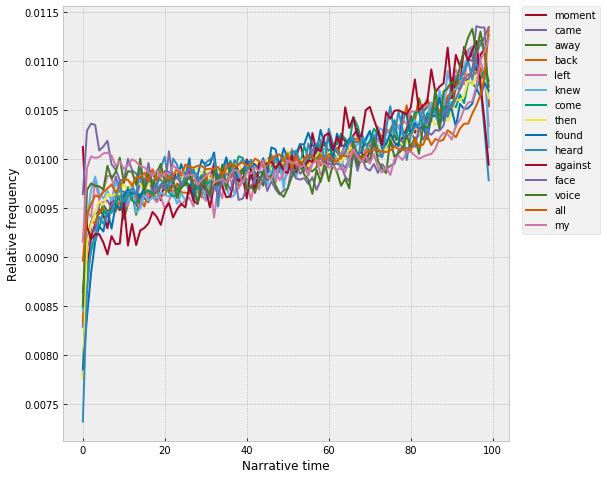

In [292]:
plot_cohort('''
moment
came
away
back
left
knew
come
then
found
heard
against
face
voice
all
my
''')

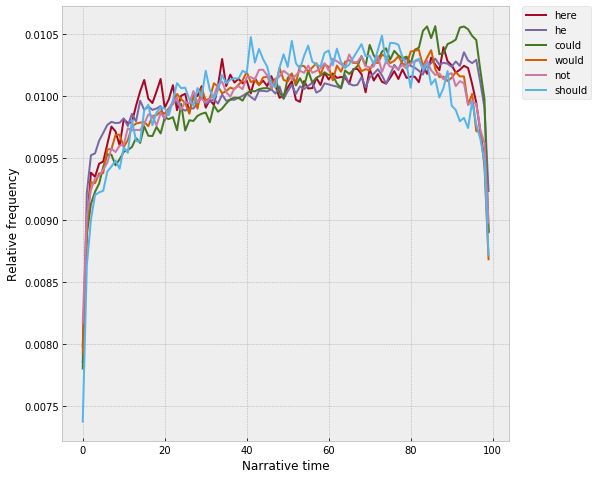

In [289]:
plot_cohort('''
here
he
could
would
not
should
''')

## Telling, believing, understanding, "you"

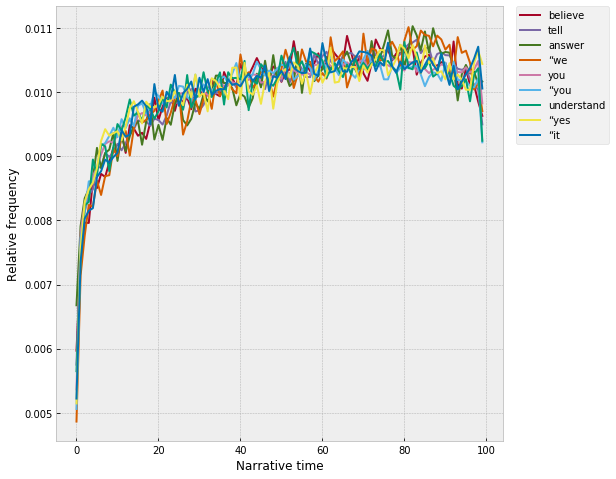

In [231]:
plot_cohort('''
believe
tell
answer
“we
you
“you
understand
“yes
“it
''')

## Talking, replying

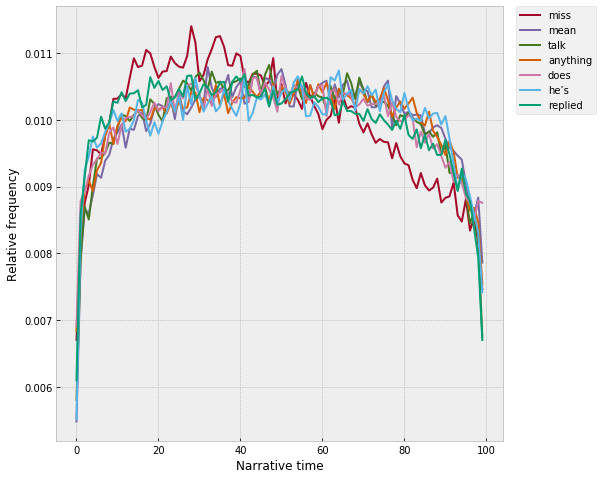

In [275]:
plot_cohort('''
miss
mean
talk
anything
does
he’s
replied
''')

## Direct discourse

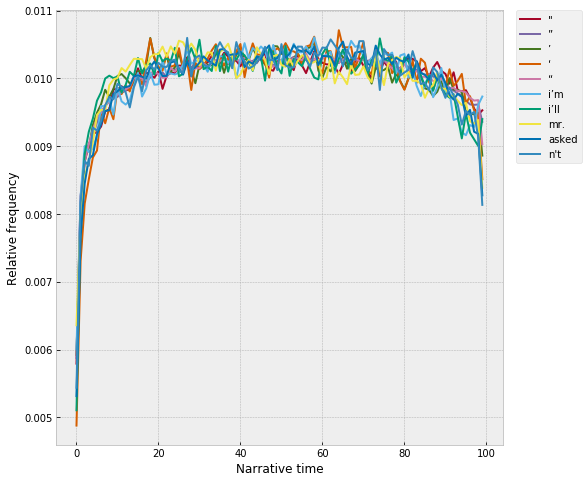

In [235]:
plot_cohort('''
"
”
’
‘
“
i’m
i’ll
mr.
asked
n't
''')

## Interiority - thinking, wanting, knowing

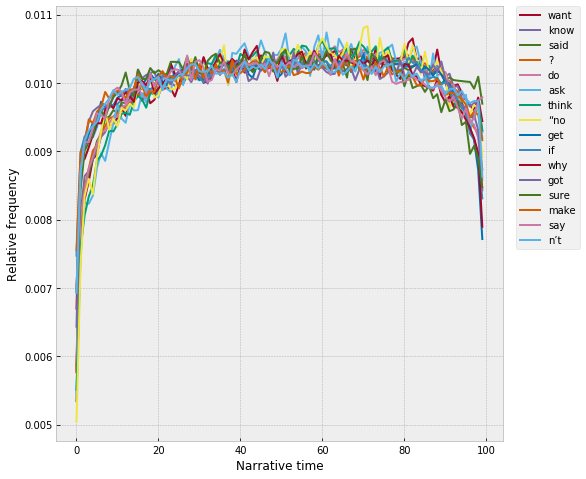

In [236]:
plot_cohort('''
want
know
said
?
do
ask
think
“no
get
if
why
got
sure
make
say
n’t
''')